### Multiple Linear Regression from scratch and observing effects of L2 regularization

Multiple Linear regression on KC Housing Data

In [16]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
#dataset
train_data = pd.read_csv('kc_house_train_data.csv')
print('Number of samples in training data :' + str(len(train_data)))

Number of samples in training data :17384


In [3]:
#dataset info
train_data.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
#Column names
train_data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [52]:
#Columns to be used and normalising sqft columns and target variables
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','grade']
y_train = train_data['price'].values
y_train = (y_train - np.mean(y_train))/np.std(y_train)
y_train = y_train.reshape(y_train.shape[0],1)
x_train = train_data.loc[:,features].values
x_train[:,2] = (x_train[:,2]-np.mean(x_train[:,2]))/np.std(x_train[:,2])
x_train[:,3] = (x_train[:,3]-np.mean(x_train[:,3]))/np.std(x_train[:,3])
x_train = np.concatenate((np.ones(shape=(x_train.shape[0],))[:, np.newaxis], x_train), axis=1)

#### Regression coefficients by equating derivative of Residual sum of squres to zero

In [53]:
theta = np.linalg.inv(x_train.T@x_train)@(x_train.T@y_train)

[[-1.4234356 ]
 [-0.13007205]
 [-0.03825272]
 [ 0.57729273]
 [-0.03804268]
 [-0.11706125]
 [ 0.27661825]]


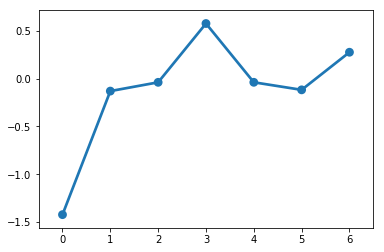

In [55]:
print(theta)
ax = sns.pointplot(x = list(range(theta.shape[0])),y=theta.reshape(-1))

#### By Batch Gradient Descent

In [50]:
#returning mini batches of data
def data_loader(x_train,y_train,mini_batch_size):
    if(mini_batch_size=='default'):
        return[(x_train,y_train)]
    
    else:
        
        num_minibatches = int(x_train.shape[0]/mini_batch_size)
        mini_batches = []
        for i in range(num_minibatches):
            x_batch = x_train[mini_batch_size*i:mini_batch_size*(i+1),:]
            y_batch = y_train[mini_batch_size*i:mini_batch_size*(i+1)]
            mini_batches.append((x_batch,y_batch))

        if(x_train.shape[0]%mini_batch_size!=0):
            mini_batches.append((x_train[num_minibatches*mini_batch_size:x_train.shape[0],:],y_train[num_minibatches*mini_batch_size:x_train.shape[0]]))

        return mini_batches    

In [92]:
#Mini batch Gradient Descent
#Adding column of ones for intercept term

def regression_coefficients(x_train,y_train,learning_rate,iters,mini_batch_size='default'):
    theta = np.random.randn(7,1)*0.01
    costs = []
    
    for i in range(iters):
        num_minibatches = int(x_train.shape[0]/mini_batch_size)
        mini_batches = data_loader(x_train,y_train,mini_batch_size)
        avg_cost = 0
        for b in mini_batches:
            x_batch,y_batch = b[0],b[1]
            avg_cost = avg_cost + ((1/x_batch.shape[0])*np.sum((y_batch - (x_batch@theta))**2))
            grads = (-2/x_batch.shape[0])*(np.dot(x_batch.T,(y_batch - (x_batch@theta))))
            theta = theta - (learning_rate*grads)
        costs.append(avg_cost/num_minibatches)    
            
    return theta,costs            

In [93]:
theta,training_costs = regression_coefficients(x_train,y_train,0.0077,100,77)

[[-1.33290622]
 [-0.15320378]
 [-0.03104788]
 [ 0.58278004]
 [-0.04630158]
 [-0.09536307]
 [ 0.2623104 ]]


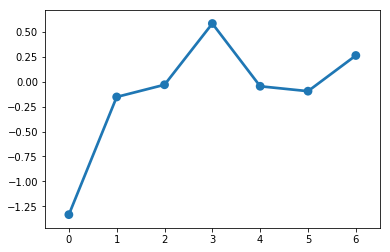

In [94]:
print(theta)
ax = sns.pointplot(x = list(range(theta.shape[0])),y=theta.reshape(-1))

Approximately same as we got by equating the gradient of the cost function to zero

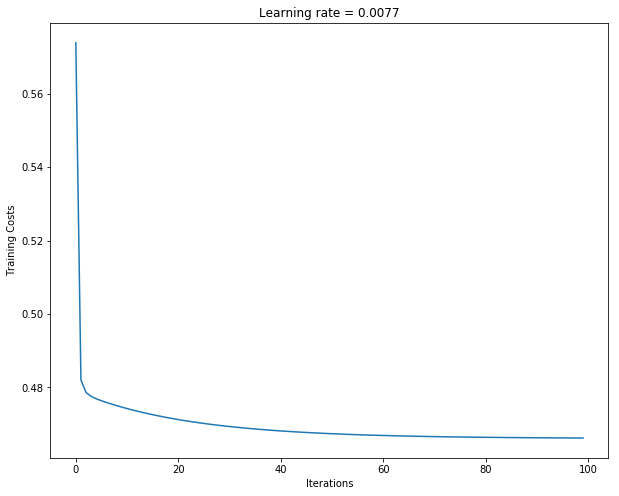

In [100]:
fig = plt.figure(figsize = (10,8))
plt.plot(training_costs)
plt.title('Learning rate = 0.0077')
plt.xlabel('Iterations')
plt.ylabel('Training Costs')
plt.show()